# <center>Procesado Masivo de Datos</center>
## <center>PROYECTO FINAL - Predicción de accidente cerebrovascular</center>
### <center>Carla García Gallego, Helena Puente Díaz, Marta Rodrigo Sebastián</center>

El siguiente notebook incluye diversos algoritmos de machine learning empleados para predecir la existencia o alta probabilidad de que un paciente sufra un accidente cerebrovascular en base a diferentes variables.

Para ello, se utiliza la base de datos *healthcare-dataset-stroke-data.csv*, obtenida de la página: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Esta base de datos cuenta con 12 variables y 5110 observaciones (cada observación corresponde con un paciente).
Las características a tener en cuenta al elaborar las predicciones son:

- Id: identificador del paciente
- Gender: género del paciente. Masculino, femenino u otro.
- Age: Edad del paciente.
- Hypertension: 0 si el paciente no padece hipertensión y 1 si el paciente padece esta patología.
- Heart_disease: 0 si el paciente no tiene niguna afección cardiaca y 1 si el paciente padece esta patología.
- Ever_married: sí o no, según si el paciente está o no casado.
- Work_type: "children", "Govt_jov", "Never_worked", "Private" o "Self-employed".
- Residence_type: "Rural" o "Urban".
- Avg_glucose_level: nivel medio de glucosa en sangre.
- Bmi: índice de masa corporal.
- Smoking_status: "formerly smoked", "never smoked", "smokes" o "Unknown". ("Unknown" significa que no existe información disponible para el paciente sobre esta característica). 
- Stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no.

En primer lugar, se comienza importando los **módulos** necesarios para la realización de las diferentes tareas llevadas a cabo posteriormente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import imblearn
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve, GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from IPython.display import Image
from sklearn.utils import resample
from statistics import mode
import time 

## <center><font style="color:steelblue">1. CARGA DE LA BASE DE DATOS</font></center>

In [2]:
database = pd.read_csv("healthcare-dataset-stroke-data.csv") #Carga de la base de datos
print(database.shape) #Dimensiones de la base de datos
database.head(20)

(5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
13   8213    Male  78.0             0              1          Yes   
14   5317  Female  79.0             0              1          Yes   
15  58202  Female  50.0             1              0          Yes   
16  56112    Male  64.0             0              1          Yes   
17  34120    Male  75.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
19  25226    Male  57.0             0              1           No   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
1   Self-employed          Rural             202.21   NaN     never smoked   
2         Private          Rural             105.92  32.5     never smoked   
3         Private          Urban             171.23  34.4           smokes   
4   Self-employed          Rural             174.12  24.0     never smoked   
5         Private          Urban             186.21  29.0  formerly smoked   
6         Private          Rural              70.09  27.4     never smoked   
7         Private          Urban              94.39  22.8     never smoked   
8         Private          Rural              76.15   NaN          Unknown   
9         Private          Urban              58.57  24.2          Unknown   
10        Private          Rural              80.43  29.7     never smoked   
11       Govt_job          Rural             120.46  36.8           smokes   
12        Private          Urban             104.51  27.3           smokes   
13        Private          Urban             219.84   NaN          Unknown   
14        Private          Urban             214.09  28.2     never smoked   
15  Self-employed          Rural             167.41  30.9     never smoked   
16        Private          Urban             191.61  37.5           smokes   
17        Private          Urban             221.29  25.8           smokes   
18        Private          Urban              89.22  37.8     never smoked   
19       Govt_job          Urban             217.08   NaN          Unknown   

    stroke  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  
10       1  
11       1  
12       1  
13       1  
14       1  
15       1  
16       1  
17       1  
18       1  
19       1

Tal y como se puede observar, es necesario hacer un pre-procesado de estos datos ya que, por ejemplo, existen variables con 
valores NaN que no son de utilidad (representan un valor que falta o se desconoce).

## <center><font style="color:steelblue">2. PRE-PROCESADO DE LOS DATOS</font></center>

En este apartado se llevan a cabo las operaciones comentadas anteriormente.

#### Eliminación de la columna id

In [3]:
data = database.drop("id",axis=1) #Se elimina la variable id porque no es relevante en este caso

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


En la celda superior se observan 201 valores perdidos en la variable bmi. La solución que se considera de utilidad frente a este problema consiste en reemplazar dichos valores por la mediana de la variable. 

Del mismo modo, se puede observar que la variable age es de tipo float64. Al tratarse de la edad de los pacientes, se considera que los valores que esta variable debe tomar son números enteros, por lo que es necesario convertir dicha columna a tipo int.

#### Remplazamiento de valores NaN en BMI

In [5]:
data["bmi"].fillna(data["bmi"].median(),inplace=True)
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Tal y como se puede comprobar, ya no existe ningún valor perdido (Nan) en la base de datos. 

#### Conversión del tipo de la variable edad a int64

In [6]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int32  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 419.3+ KB


#### Remplazamiento de valores 0 en EDAD

En el caso de esta misma variable, age, el número 0 se considera un valor perdido en este caso, por lo que se revisa si la variable toma este valor y se imputa por la mediana.

In [7]:
data[data.age == 0].shape

(43, 11)

In [8]:
#Age toma el valor 0 11 veces, por lo que se imputará por la mediana
data["age"] = data["age"].replace({0: data["age"].median()})

In [9]:
data[data.age == 0].shape

(0, 11)

## <center><font style="color:steelblue">3. CODIFICACIÓN</font></center>

En la base de datos se encuentran variables de distintos tipos:
- Numéricas: age, bmi, avg_glucose_level, hypertension, heart_disease, stroke 
- Categóricas: gender, ever_married, work_type, Residence_type, smoking_status

Las variables categóricas se codifican a continuación ya que, al tratarse de variables de texto plano, la dificultad para operar con ellas es elevada. Por este motivo, en este apartado se lleva a cabo la codificación de las mismas, con el objetivo de facilitar el posterior tratamiento y análisis. 

Para cada una de las variables se lleva a cabo una codificación numérica en función de los datos que presenta.
En la celda siguiente se muestra qué número pertenece a cada categoría. Después se modifica el nombre de cada categoría por el valor numérico asociado. Por último, se comprueba que todas las variables de la base de datos son numéricas.

In [10]:
a = data.gender.astype('category')
a1 = dict(enumerate(a.cat.categories))
print(a1)


b = data.ever_married.astype('category')
b1 = dict(enumerate(b.cat.categories))
print(b1)

c = data.work_type.astype('category')
c1 = dict(enumerate(c.cat.categories))
print(c1)

d = data.Residence_type.astype('category')
d1 = dict(enumerate(d.cat.categories))
print(d1)

e = data.smoking_status.astype('category')
e1 = dict(enumerate(e.cat.categories))
print(e1)

{0: 'Female', 1: 'Male', 2: 'Other'}
{0: 'No', 1: 'Yes'}
{0: 'Govt_job', 1: 'Never_worked', 2: 'Private', 3: 'Self-employed', 4: 'children'}
{0: 'Rural', 1: 'Urban'}
{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}


In [11]:
data['gender'] = data['gender'].astype('category').cat.codes 
data['ever_married'] = data['ever_married'].astype('category').cat.codes 
data['work_type'] = data['work_type'].astype('category').cat.codes 
data['Residence_type'] = data['Residence_type'].astype('category').cat.codes 
data['smoking_status'] = data['smoking_status'].astype('category').cat.codes 

## <center><font style="color:steelblue">4. ANÁLISIS EXPLORATORIO</font></center>

Con los datos codificados el siguiente paso es realizar el análisis. Con este apartado se quiere observar los rangos de cada variable, medias, desviaciones, etc.

In [12]:
edad = data['age']
gender = data['gender']
bmi = data['bmi']
avg_glucose_level = data['avg_glucose_level']
hypertension = data['hypertension']
heart_disease = data['heart_disease']
smoking_status = data['smoking_status']
ever_married = data['ever_married']
work_type = data['work_type']
residence_type = data['Residence_type']
stroke = data['stroke']

### GRÁFICOS

En primer lugar, se dibujan diferentes gráficos para estudiar de forma visual las variables. Los gráficos elegidos son:
- Histograma: Gráfico que indica la frecuencia de un hecho mediante una distribución de los datos.
- Diagrama de cajas y bigotes (Boxplot): Describe varias características importantes, como la dispersión y simetría. Establece  los valores mínimo y máximo, el primer, segundo y tercer cuartil (Q1, Q2 y Q3) y valores atípicos.
- Gráfico circular: Representar porcentajes y proporciones.

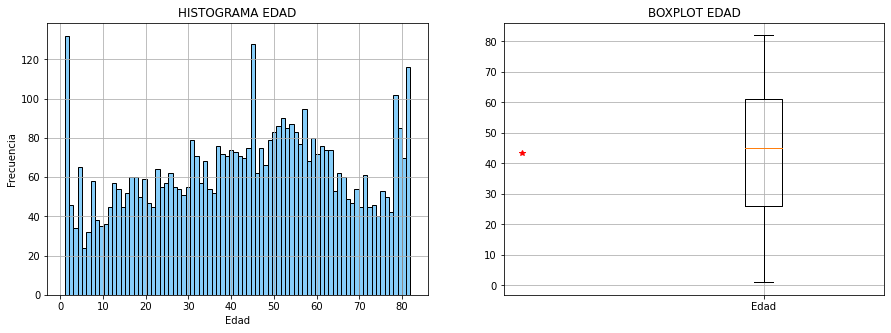

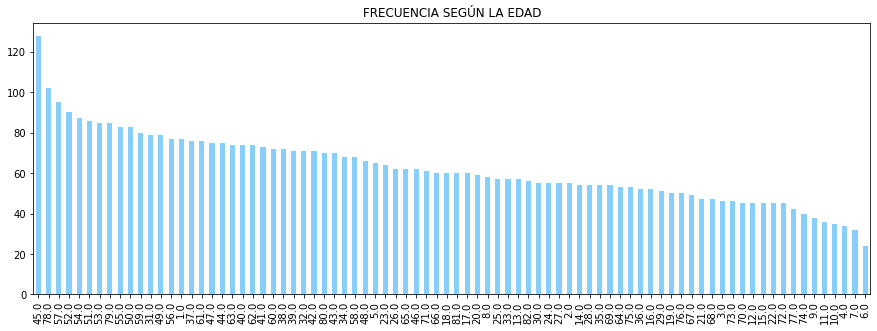

In [13]:
#-------------------------------------------------------- EDAD --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA EDAD')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.hist(edad, bins=80, alpha=1, color = "lightskyblue", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT EDAD')
plt.boxplot(edad)
plt.xticks([1], ['Edad'])
plt.plot(np.average(edad), color='r', marker='*')
plt.grid(True)

plt.figure(figsize=[15,5])
edad.value_counts().plot.bar(title='FRECUENCIA SEGÚN LA EDAD', color='lightskyblue')
plt.show()

Para la variable edad, la visualización del histograma permite observar que el rango de esta va de 1 a 82, siendo la edad más frecuente 45 años. 

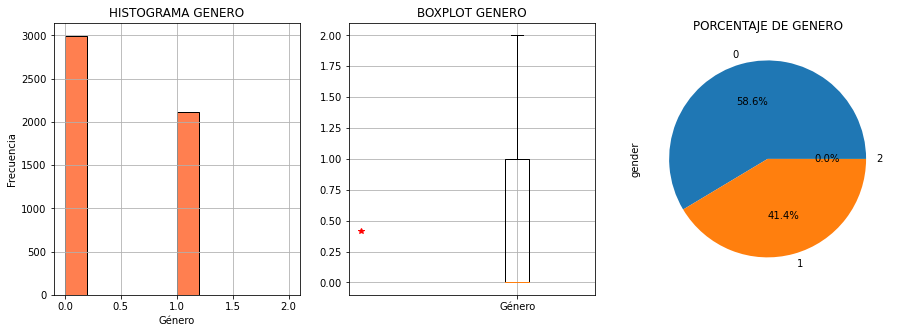

In [14]:
#-------------------------------------------------------- GENERO --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA GENERO')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.hist(gender, bins=10, alpha=1, color = "coral", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT GENERO')
plt.boxplot(gender)
plt.xticks([1], ['Género'])
plt.plot(np.average(gender), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
gender.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE GENERO')
plt.show()

En el caso de esta variable, se puede comprobar que el género mayoritario en la base de datos es mujer. 

In [15]:
df_gender = pd.DataFrame()
df_gender['Número'] = gender.value_counts()
df_gender['Porcentaje'] = gender.value_counts(2)

df_gender

Número  Porcentaje
0    2994    0.585910
1    2115    0.413894
2       1    0.000196

Con la línea de código superior se advierte la presencia de un tercer valor con un muy pequeño porcentaje que corresponde con "otro".

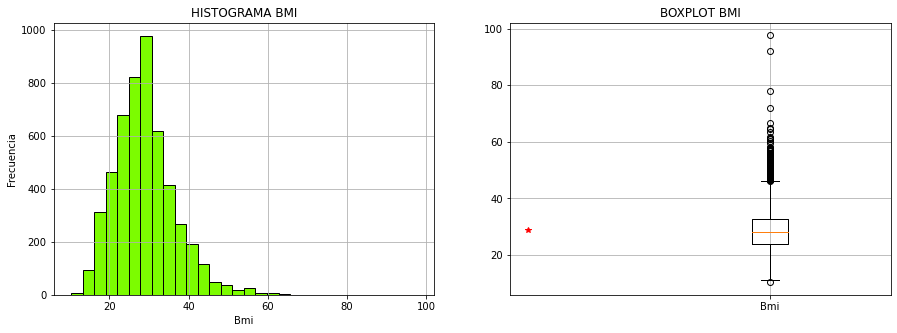

In [16]:
#-------------------------------------------------------- BMI --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA BMI')
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')
plt.hist(bmi, bins=30, alpha=1, color = "lawngreen", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT BMI')
plt.boxplot(bmi)
plt.xticks([1], ['Bmi'])
plt.plot(np.average(bmi), color='r', marker='*')
plt.grid(True)

Graficando el diagrama de cajas y bigotes para esta variable se puede observar que presenta valores atípicos, los cuales deben ser procesados posteriormente. 

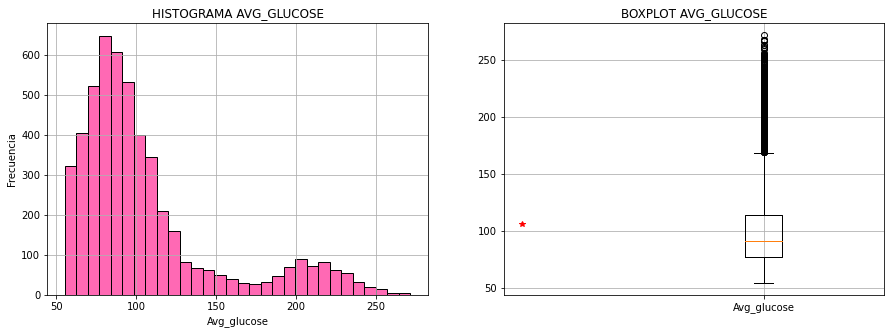

In [17]:
#-------------------------------------------------------- AVG_GLUCOSE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA AVG_GLUCOSE')
plt.xlabel('Avg_glucose')
plt.ylabel('Frecuencia')
plt.hist(avg_glucose_level, bins=30, alpha=1, color = "hotpink", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT AVG_GLUCOSE')
plt.boxplot(avg_glucose_level)
plt.xticks([1], ['Avg_glucose'])
plt.plot(np.average(avg_glucose_level), color='r', marker='*')
plt.grid(True)

El histograma de la glucosa se muestra muy asimétrico. Además, al igual que en la variable anterior y como se visualiza en el boxplot de la derecha, se tienen valores atípicos los cuales siguen el mismo procedimiento que se ha comentado anteriormente.

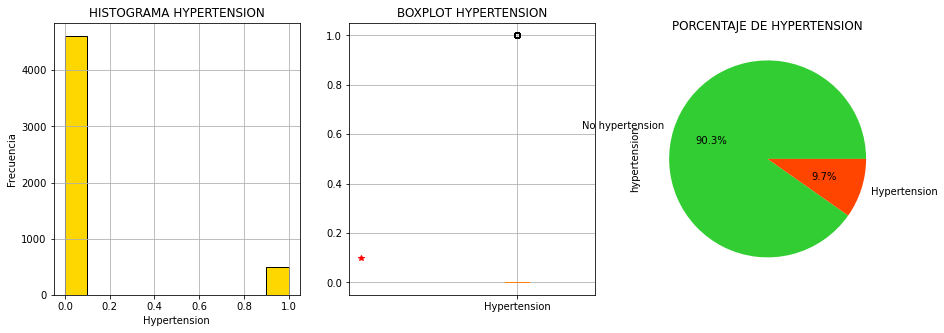

In [18]:
#-------------------------------------------------------- HYPERTENSION --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA HYPERTENSION')
plt.xlabel('Hypertension')
plt.ylabel('Frecuencia')
plt.hist(hypertension, bins=10, alpha=1, color = "gold", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT HYPERTENSION')
plt.boxplot(hypertension)
plt.xticks([1], ['Hypertension'])
plt.plot(np.average(hypertension), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
hypertension.value_counts().plot.pie(labels=['No hypertension', 'Hypertension'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', title='PORCENTAJE DE HYPERTENSION')
plt.show()

Como se evidencia en las gráficas superiores, existe un mayor número de pacientes sin hipertensión que con ella, exactamente el 90.3%.

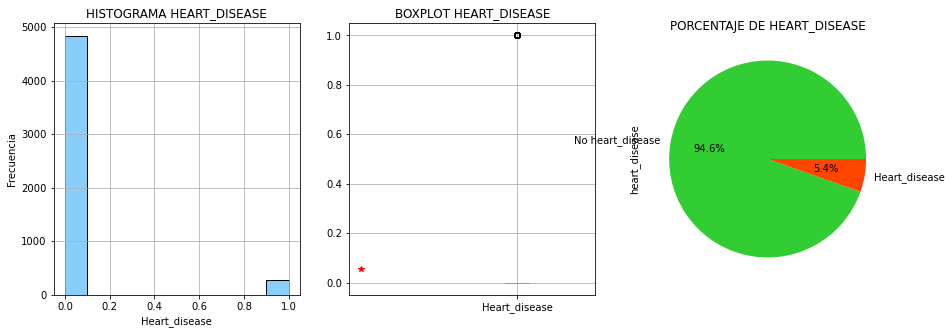

In [19]:
#-------------------------------------------------------- HEART DISEASE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA HEART_DISEASE')
plt.xlabel('Heart_disease')
plt.ylabel('Frecuencia')
plt.hist(heart_disease, bins=10, alpha=1, color = "lightskyblue", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT HEART_DISEASE')
plt.boxplot(heart_disease)
plt.xticks([1], ['Heart_disease'])
plt.plot(np.average(heart_disease), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
heart_disease.value_counts().plot.pie(labels=['No heart_disease', 'Heart_disease'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', title='PORCENTAJE DE HEART_DISEASE')
plt.show()

Al igual que en el caso anterior, existe un mayor porcentaje de pacientes sin la patología que establece esta variable, es decir, hay un mayor número de personas que no presentan enfermedad cardíaca.

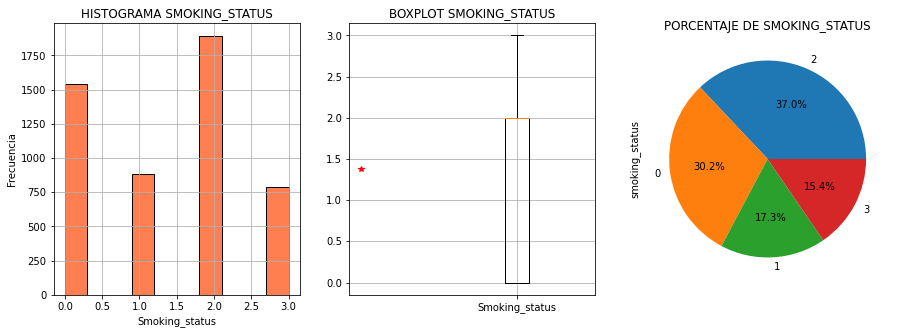

In [20]:
#-------------------------------------------------------- SMOKING_STATUS --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA SMOKING_STATUS')
plt.xlabel('Smoking_status')
plt.ylabel('Frecuencia')
plt.hist(smoking_status, bins=10, alpha=1, color = "coral", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT SMOKING_STATUS')
plt.boxplot(smoking_status)
plt.xticks([1], ['Smoking_status'])
plt.plot(np.average(smoking_status), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
smoking_status.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE SMOKING_STATUS')
plt.show()

La variable smoking_status ha sido codificada en 4 grupos, siendo estos del 0 al 3 incluidos. Como se puede observar, el grupo dominante para esta categoría es el 2, correspondiendose con "never_smoked". 

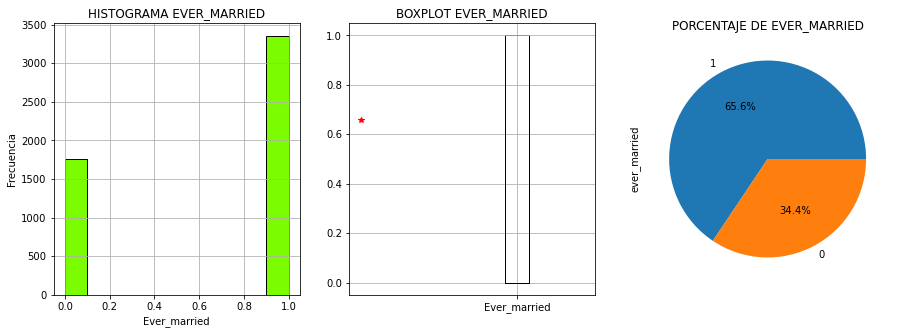

In [21]:
#-------------------------------------------------------- EVER_MARRIED --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA EVER_MARRIED')
plt.xlabel('Ever_married')
plt.ylabel('Frecuencia')
plt.hist(ever_married, bins=10, alpha=1, color = "lawngreen", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT EVER_MARRIED')
plt.boxplot(ever_married)
plt.xticks([1], ['Ever_married'])
plt.plot(np.average(ever_married), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
ever_married.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE EVER_MARRIED')
plt.show()

En los pacientes de la base de datos existe un mayor número de casados. 

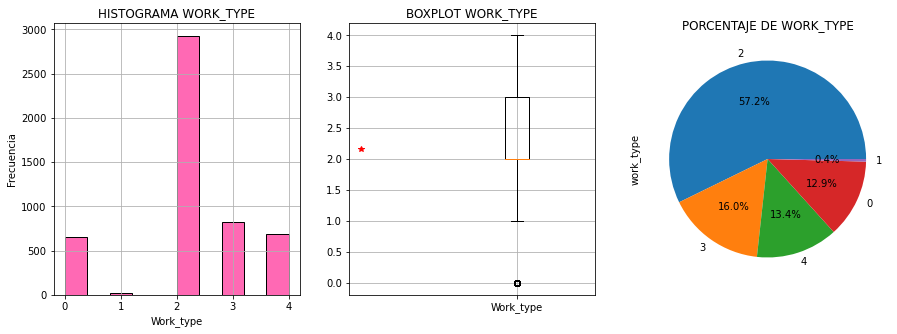

In [22]:
#-------------------------------------------------------- WORK_TYPE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA WORK_TYPE')
plt.xlabel('Work_type')
plt.ylabel('Frecuencia')
plt.hist(work_type, bins=10, alpha=1, color = "hotpink", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT WORK_TYPE')
plt.boxplot(work_type)
plt.xticks([1], ['Work_type'])
plt.plot(np.average(work_type), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
work_type.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE WORK_TYPE')
plt.show()

La variable work_type ha sido codificada en 5 grupos, siendo estos del 0 al 4 incluidos. Como se puede observar, el grupo dominante es el 2, correspondiendose con "private".

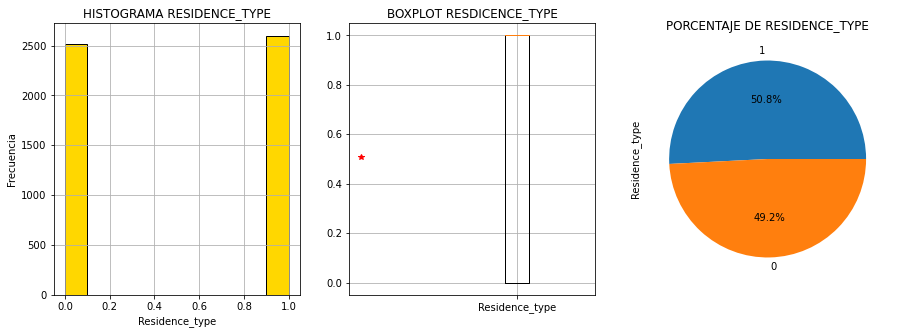

In [23]:
#-------------------------------------------------------- RESIDENCE_TYPE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA RESIDENCE_TYPE')
plt.xlabel('Residence_type')
plt.ylabel('Frecuencia')
plt.hist(residence_type, bins=10, alpha=1, color = "gold", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT RESDICENCE_TYPE')
plt.boxplot(residence_type)
plt.xticks([1], ['Residence_type'])
plt.plot(np.average(residence_type), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
residence_type.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE RESIDENCE_TYPE')
plt.show()

Tal y como se puede ver en el histograma y en el gráfico circular, está muy equilibrada. Predominando con ligereza el tipo de residencia urbano.

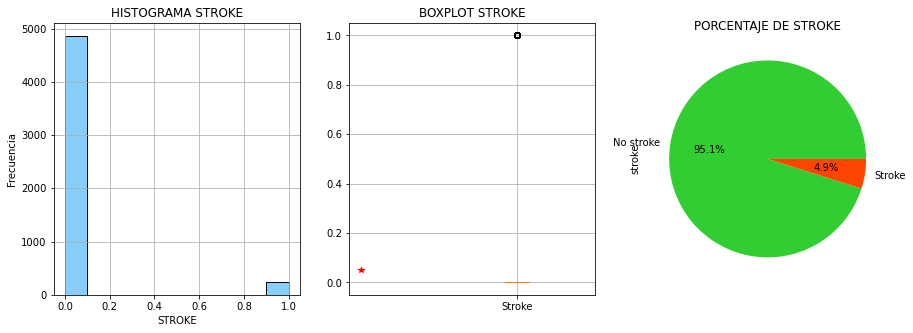

In [24]:
#-------------------------------------------------------- STROKE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA STROKE')
plt.xlabel('STROKE')
plt.ylabel('Frecuencia')
plt.hist(stroke, bins=10, alpha=1, color = "lightskyblue", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT STROKE')
plt.boxplot(stroke)
plt.xticks([1], ['Stroke'])
plt.plot(np.average(stroke), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
stroke.value_counts().plot.pie(labels=['No stroke', 'Stroke'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', title='PORCENTAJE DE STROKE')
plt.show()

Como se evidencia en las gráficas superiores, existe un mayor número de pacientes sin ictus que con el. Lo que indica que la base de datos se encuentra desbalanceada, al ser esta variable la que se busca predecir. Este problema es solventado posteriormente.

### TRATAMIENTO DE OUTLIERS

En este apartado se tratan los outliers o valores atípicos. Estos se definen como una observación numéricamente distante del resto de los datos. Con los resultados obtenidos de los gráficos superiores, se llega a la conclusión de que las variables que presentan valores atípicos son:
- Bmi
- Avg_glucose_level

(Al cargar la base de datos se identificaron 201 missing values para la variable bmi y se trataron imputándolos por la mediana).

Se utiliza tanto el criterio estadístico Z-score como el criterio visual con los diagramas de cajas y bigotes superiores. 
Para tratarlos, se cambia el valor por la mediana de dicha variable.

In [25]:
#Z-SCORE
#Función que devuelve el número de valores anómalos

def outliers(lista, media_lista, std_lista):
    num_outliers = 0 #Contador para los valores anómalos
    #Definición de los límites del intervalo que comprenderá los valores normales
    lim1 = media_lista + 2*std_lista
    lim2 = media_lista - 2*std_lista
    #El intervalo en el cual debe estar un valor para no ser considerado anómalo es [lim1, lim2]
    for i in range(0,len(lista)):
        if (lista[i] > lim1 or lista[i] < lim2):
            num_outliers = num_outliers+1
    return(num_outliers)

In [26]:
#PROCEDIMIENTO MEDIANTE Z-SCORE
#Criterio: media +- 2*std

#Media de cada variable 
media_glu = data["avg_glucose_level"].mean()
media_bmi = data["bmi"].mean()

#Desviación típica de cada variable
std_glu = data["avg_glucose_level"].std()
std_bmi = data["bmi"].std()

#Cálculo para cada variable
num_outliers1 = outliers(data["avg_glucose_level"], media_glu, std_glu)
print ("El número de valores atípicos para la variable avg_glucose_level es: ", num_outliers1)
num_outliers2 = outliers(data["bmi"], media_bmi, std_bmi)
print ("El número de valores atípicos para la variable bmi es: ", num_outliers2)

El número de valores atípicos para la variable avg_glucose_level es:  470
El número de valores atípicos para la variable bmi es:  192


Una vez hecho esto, se tratan los outliers de las variables avg_glucose_level y bmi.

In [27]:
#CORRECCIÓN OUTLIERS AVG_GLUCOSE_LEVEL
#Intervalo que diferencia valores normales y anómalos
lim1 = media_glu + 2*std_glu
lim2 = media_glu - 2*std_glu

for i in range (0, len(data["avg_glucose_level"])):
    if (data["avg_glucose_level"][i] > lim1 or data["avg_glucose_level"][i] < lim2):
        data["avg_glucose_level"][i] = data["avg_glucose_level"].median()
    
#CORRECCIÓN OUTLIERS BMI
#Intervalo que diferencia valores normales y anómalos
lim1 = media_bmi + 2*std_bmi
lim2 = media_bmi - 2*std_bmi

for i in range (0, len(data["bmi"])):
    if (data["bmi"][i] > lim1 or data["bmi"][i] < lim2):
        data["bmi"][i] = data["bmi"].median()

<ipython-input-27-f0d003b58451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["avg_glucose_level"][i] = data["avg_glucose_level"].median()
<ipython-input-27-f0d003b58451>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bmi"][i] = data["bmi"].median()


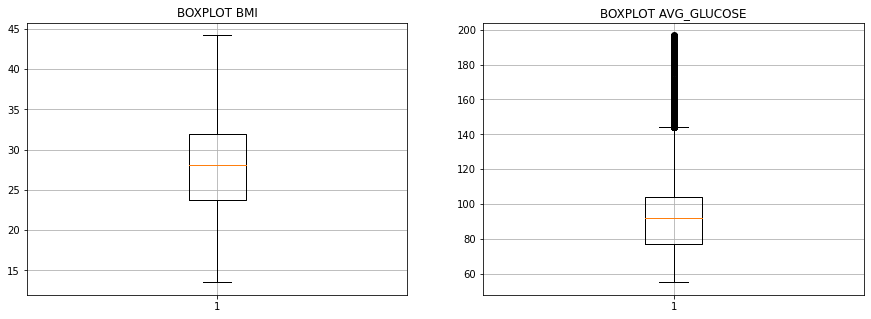

In [28]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('BOXPLOT BMI')
plt.boxplot(data["bmi"])
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT AVG_GLUCOSE')
plt.boxplot(data["avg_glucose_level"])
plt.grid(True)
plt.show()

Para la variable bmi se puede observar que el tratamiento de outliers ha sido el correcto (comparado con el boxplot obtenido en los gráficos superiores). En el caso de la variable avg_glucose se comprueba que sigue presentando ciertos valores atípicos que pueden ser de interés (con los criterios utilizados).

### DIAGRAMAS DE DISPERSIÓN

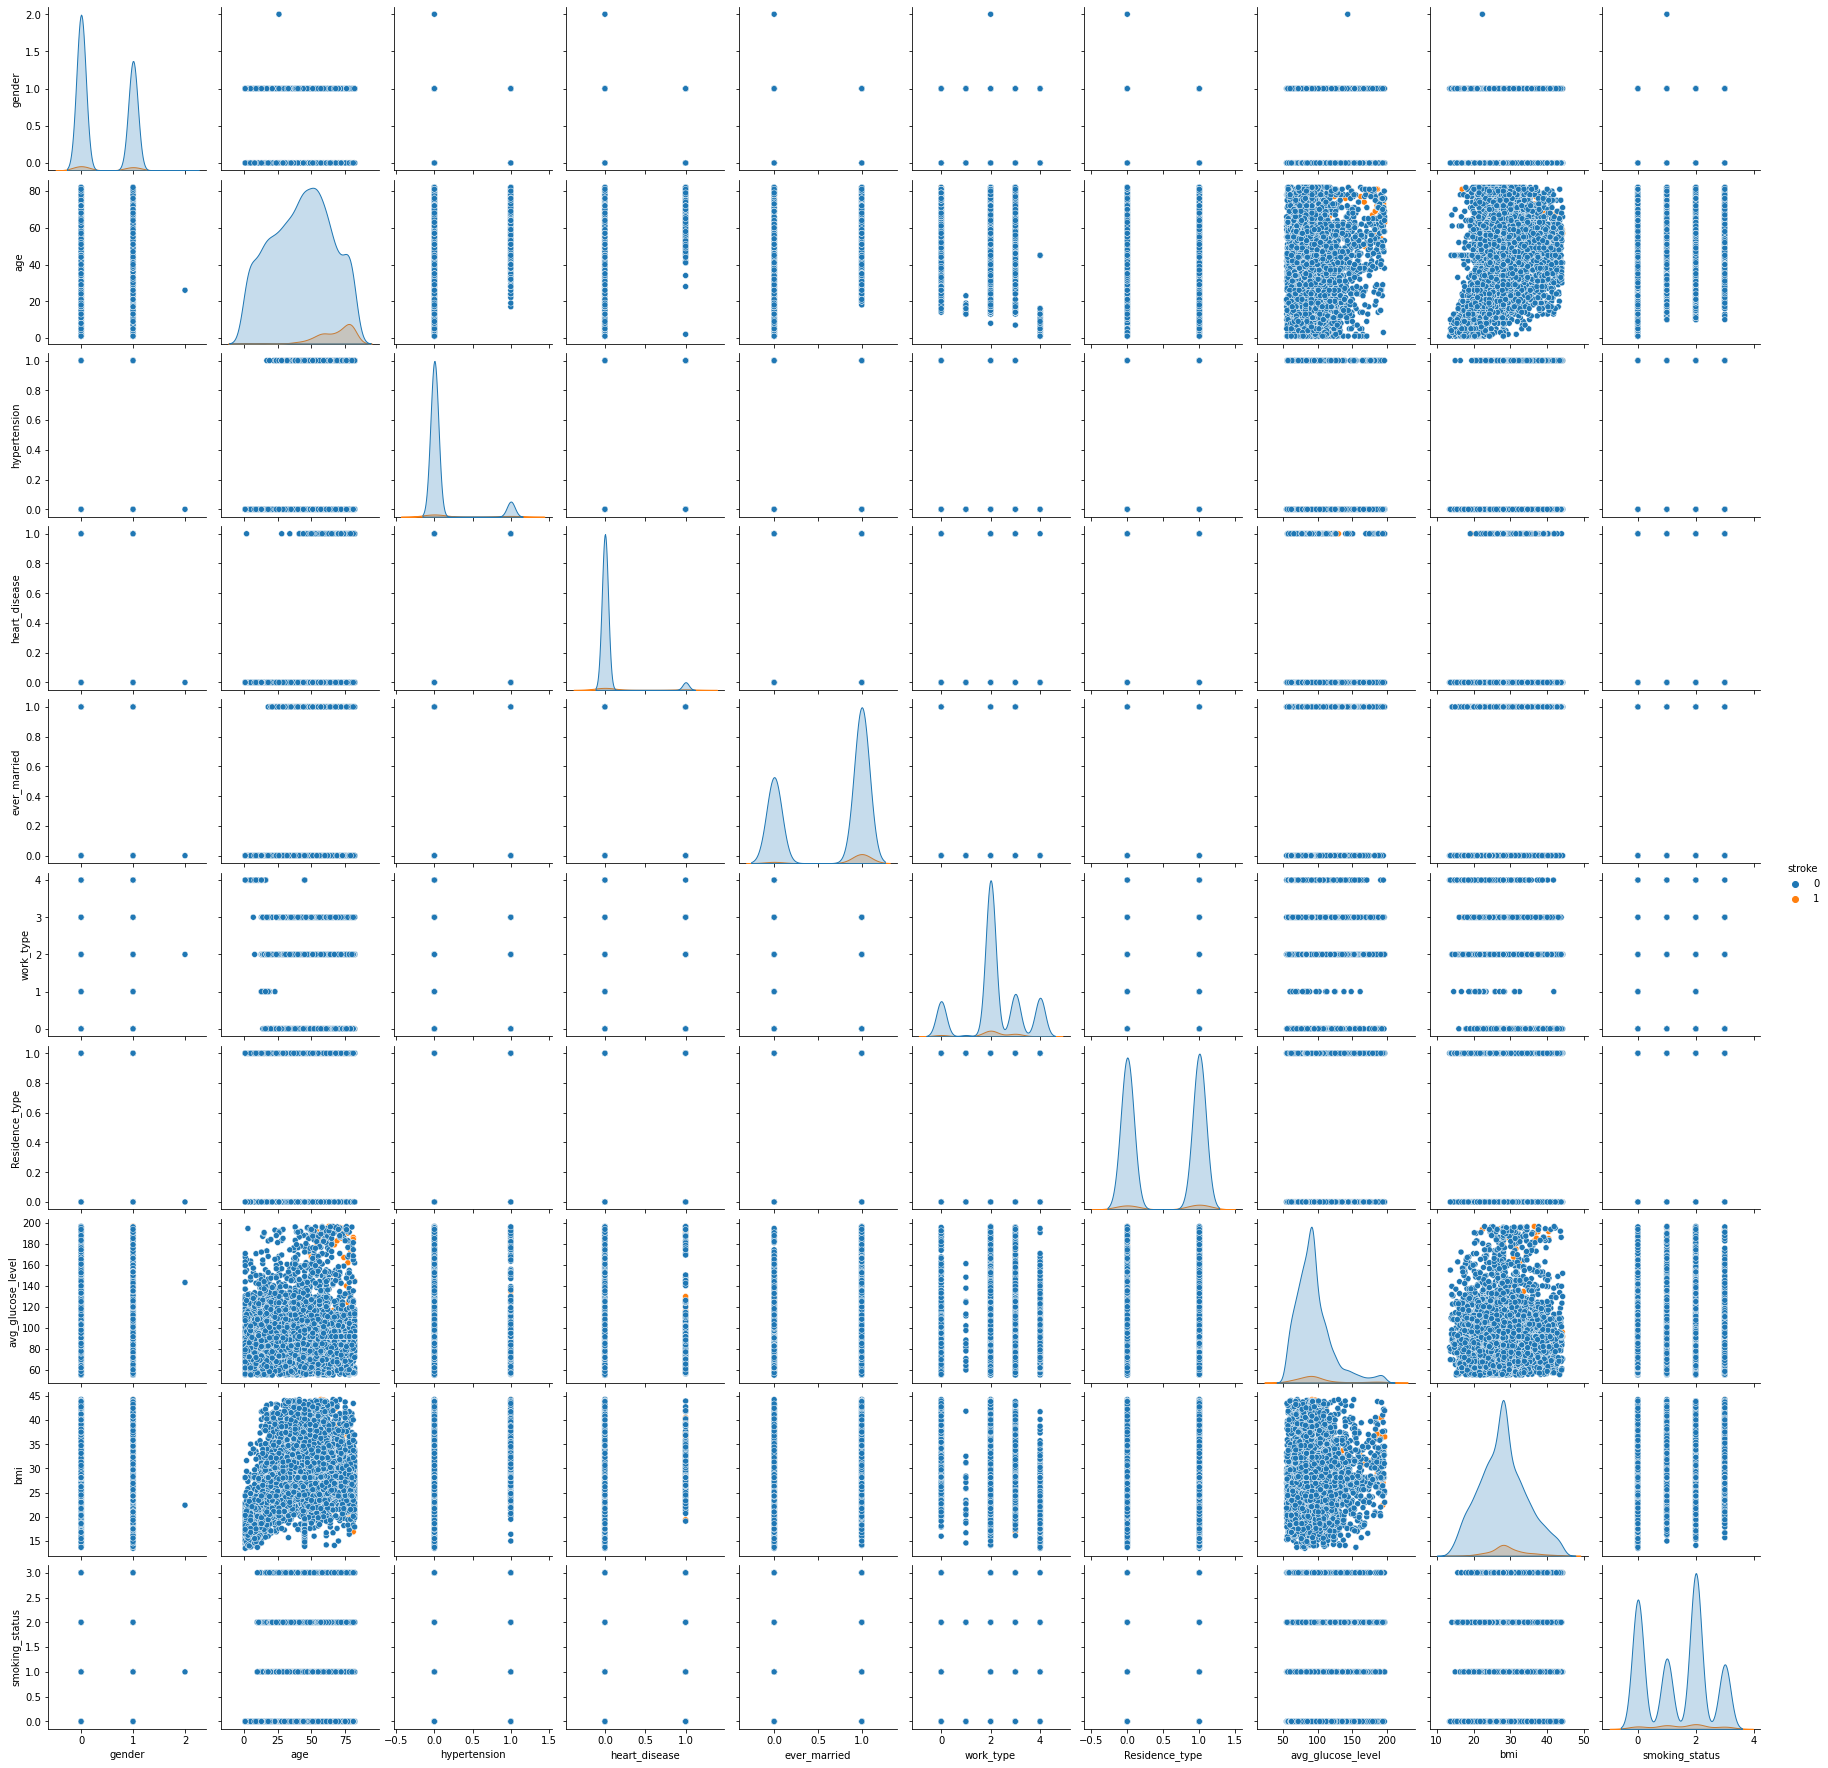

In [29]:
#Comparación de variables dos a dos
sns.pairplot(data, hue = 'stroke') #Permite ver la superposición de los datos

### CÁLCULOS ESTADÍSTICOS

In [30]:
data.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.414286    43.593933      0.097456       0.054012      0.656164   
std       0.493044    22.281313      0.296607       0.226063      0.475034   
min       0.000000     1.000000      0.000000       0.000000      0.000000   
25%       0.000000    26.000000      0.000000       0.000000      0.000000   
50%       0.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       2.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      2.167710        0.508023          94.364014    28.085656   
std       1.090293        0.499985          26.730031     6.261410   
min       0.000000        0.000000          55.120000    13.500000   
25%       2.000000        0.000000          77.245000    23.800000   
50%       2.000000        1.000000          91.880000    28.100000   
75%       3.000000        1.000000         103.935000    32.000000   
max       4.000000        1.000000         196.710000    44.200000   

       smoking_status       stroke  
count     5110.000000  5110.000000  
mean         1.376908     0.048728  
std          1.071534     0.215320  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          2.000000     0.000000  
75%          2.000000     0.000000  
max          3.000000     1.000000

Se comprueba que los cálculos de la tabla superior coinciden con los obtenidos en los gráficos anteriores.

### CORRELACIÓN ENTRE VARIABLES

La correlación indica la relación lineal y proporcionalidad entre dos variables. El cálculo de la correlación es útil para determinar que variables están relacionadas con complicaciones y, así, establecer aquellas que se introducen al modelo. 

<AxesSubplot:>

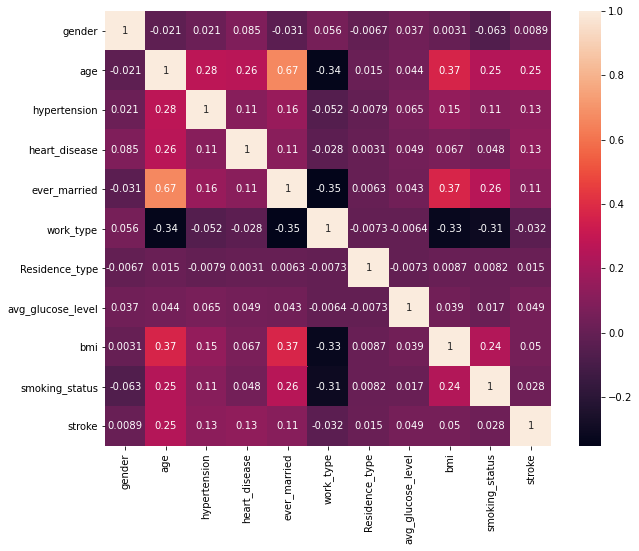

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Al tratarse de variables categóricas (variable que puede tomar un valor de posibles valores, asignando a cada unidad individual a un grupo en particular o categoría), la matriz de correlaciones no aporta información relevante. Por este motivo, se plantea utilizar el test chi-cuadrado para observar la correlación.

#### Test de la Chi-Cuadrado

Este test se utiliza para ver la correlación que existe entre dos variables nominales o de un nivel superior (variables que se tratan en este proyecto). 

La hipótesis nula (H0) indica que ambas variables son independientes, mientras que la hipótesis alternativa (H1) indica que las variables tienen algún grado de asociación o relación.
El resumen de lo comentado es el siguiente:

- Si el p-valor < 0.05, hay diferencias significativas, es decir, hay relación entre las variables.
- Si el p-valor > 0.05, no hay diferencias significativas, es decir, no existe relación entre las variables. 

In [32]:
# TABLAS DE CONTIGENCIA
tabla_contingencia1 = pd.crosstab(data['stroke'], data['gender'])
tabla_contingencia2 = pd.crosstab(data['stroke'], data['age'])
tabla_contingencia3 = pd.crosstab(data['stroke'], data['hypertension'])
tabla_contingencia4 = pd.crosstab(data['stroke'], data['heart_disease'])
tabla_contingencia5 = pd.crosstab(data['stroke'], data['ever_married'])
tabla_contingencia6 = pd.crosstab(data['stroke'], data['work_type'])
tabla_contingencia7 = pd.crosstab(data['stroke'], data['Residence_type'])
tabla_contingencia8 = pd.crosstab(data['stroke'], data['avg_glucose_level'])
tabla_contingencia9 = pd.crosstab(data['stroke'], data['bmi'])
tabla_contingencia10 = pd.crosstab(data['stroke'], data['smoking_status'])

# P-VALOR
p_valor1 = chi2_contingency(tabla_contingencia1)[1]
p_valor2 = chi2_contingency(tabla_contingencia2)[1]
p_valor3 = chi2_contingency(tabla_contingencia3)[1]
p_valor4 = chi2_contingency(tabla_contingencia4)[1]
p_valor5 = chi2_contingency(tabla_contingencia5)[1]
p_valor6 = chi2_contingency(tabla_contingencia6)[1]
p_valor7 = chi2_contingency(tabla_contingencia7)[1]
p_valor8 = chi2_contingency(tabla_contingencia8)[1]
p_valor9 = chi2_contingency(tabla_contingencia9)[1]
p_valor10 = chi2_contingency(tabla_contingencia10)[1]

lista_pvalor = [p_valor1, p_valor2, p_valor3, p_valor4, p_valor5, p_valor6, p_valor7, p_valor8, p_valor9, p_valor10]

for i in range(len(lista_pvalor)):
    p_valor = lista_pvalor[i]
               
    if p_valor < 0.05:
        print('Las variables de la tabla de contingencia', i+1, 'están relacionadas')

Las variables de la tabla de contingencia 2 están relacionadas
Las variables de la tabla de contingencia 3 están relacionadas
Las variables de la tabla de contingencia 4 están relacionadas
Las variables de la tabla de contingencia 5 están relacionadas
Las variables de la tabla de contingencia 6 están relacionadas
Las variables de la tabla de contingencia 8 están relacionadas
Las variables de la tabla de contingencia 9 están relacionadas
Las variables de la tabla de contingencia 10 están relacionadas


## <center><font style="color:steelblue">5. INTERPRETACIÓN DE LOS DATOS</font></center>

In [33]:
import plotly.figure_factory as ff
group_labels = ['0', '1']
l = [data['age'][(data["stroke"] == 0)],data['age'][(data["stroke"] == 1)]]
fig = ff.create_distplot(l, group_labels,curve_type='kde',colors = ['slategray', 'magenta'])
fig.update_layout(title_text='Age & Stroke Distribution',xaxis_title="Age Distribution",yaxis_title="Frequency")
fig.show()

Este gráfico indica que la frecuencia de aparición de ictus aumenta a medida que aumenta la edad.

In [34]:
import plotly.figure_factory as ff
group_labels = ['0', '1']
l = [data['bmi'][(data["stroke"] == 0)],data['bmi'][(data["stroke"] == 1)]]
fig = ff.create_distplot(l, group_labels,curve_type='kde',colors = ['#F66095', '#2BCDC1']
)
fig.update_layout(title_text='BMI & Stroke Distribution',xaxis_title="BMI Distribution",yaxis_title="Frequency")
fig.show()

In [35]:
import plotly.figure_factory as ff
group_labels = ['0', '1']
l = [data['avg_glucose_level'][(data["stroke"] == 0)],data['avg_glucose_level'][(data["stroke"] == 1)]]
fig = ff.create_distplot(l, group_labels,curve_type='kde',colors = ['#393E46', 'rgb(0, 200, 200)'])
fig.update_layout(title_text='Avg Glucose Level & Stroke Distribution',xaxis_title="Avg_Glucose_Level Distribution",yaxis_title="Frequency")
fig.show()

De los dos gráficos superiores no se obtienen conclusiones claras de manera visual.

## <center><font style="color:steelblue">6. ALGORITMO 1 - ÁRBOL DE DECISIÓN CON CARACTERÍSTICAS SELECCIONADAS</font></center>

En este algortimo las características que se incluyen al modelo son las obtenidas como relacionadas en el test de chi2.

In [36]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke', 'gender', 'Residence_type'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 8)
Las dimensiones de Y son:  (5110,)


### BALANCEO DE DATOS

In [37]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9604, 8)
Las dimensiones de Y balanceado son:  (9604,)


### EXTRACCIÓN DE .CSV CON LOS DATOS PREPROCESADO

In [38]:
data.to_csv('healthcare-dataset-stroke-data-preprocessed.csv', index = False)

### DIVISIÓN EN CONJUNTOS DE TRAIN Y TEST

In [39]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6722, 8) (6722,)
Las dimensiones del conjunto de test son:  (2882, 8) (2882,)


### ÁRBOL DE DECISIÓN CON REMUESTREO

(2882, 699)
La matriz de confusión es:
 [[ 742  726]
 [ 184 1230]]


<Figure size 432x288 with 0 Axes>

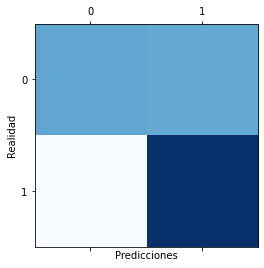

El accuracy es : 0.6842470506592644
La sensibilidad es : 0.8698727015558698
La especificidad es: 0.5054495912806539
Wall time: 8min 31s


In [40]:
%%time

predicciones = []

for i in range(699):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)
    
    #Parámetros libres
    min_samples_leaf = [1, 200, 10000] #Mínimo número de muestras para un nodo terminal
    max_depth = np.arange(1, 4) #Máxima profundidad del árbol

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'criterion':['gini','entropy'],'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf} #Se crea un árbol de clasificación
    dtree_model= tree.DecisionTreeClassifier(class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)#Se entrena el modelo con datos de Train
    dtree_model=dtree_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = dtree_model.best_estimator_
    my_tree=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)

## <center><font style="color:steelblue">7. ALGORITMO 2 - ÁRBOL DE DECISIÓN SOLO CARACTERÍSTICAS NUMÉRICAS</font></center>

In [41]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 3)
Las dimensiones de Y son:  (5110,)


In [42]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9438, 3)
Las dimensiones de Y balanceado son:  (9438,)


In [43]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6606, 3) (6606,)
Las dimensiones del conjunto de test son:  (2832, 3) (2832,)


(2832, 699)
La matriz de confusión es:
 [[ 671  765]
 [  34 1362]]


<Figure size 432x288 with 0 Axes>

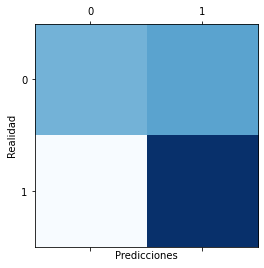

El accuracy es : 0.717867231638418
La sensibilidad es : 0.9756446991404012
La especificidad es: 0.4672701949860724
Wall time: 7min 36s


In [44]:
%%time

predicciones = []

for i in range(699):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)
    
    #Parámetros libres
    min_samples_leaf = [1, 200, 10000] #Mínimo número de muestras para un nodo terminal
    max_depth = np.arange(1, 4) #Máxima profundidad del árbol

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'criterion':['gini','entropy'],'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf} #Se crea un árbol de clasificación
    dtree_model= tree.DecisionTreeClassifier(class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)#Se entrena el modelo con datos de Train
    dtree_model=dtree_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = dtree_model.best_estimator_
    my_tree=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)

## <center><font style="color:steelblue">8. ALGORITMO 3 - ÁRBOL DE DECISIÓN CON TODAS LAS CARACTERÍSTICAS</font></center>

In [45]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 10)
Las dimensiones de Y son:  (5110,)


In [46]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9636, 10)
Las dimensiones de Y balanceado son:  (9636,)


In [47]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6745, 10) (6745,)
Las dimensiones del conjunto de test son:  (2891, 10) (2891,)


(2891, 699)
La matriz de confusión es:
 [[ 789  675]
 [  64 1363]]


<Figure size 432x288 with 0 Axes>

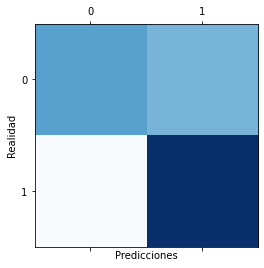

El accuracy es : 0.7443791075752335
La sensibilidad es : 0.9551506657323056
La especificidad es: 0.5389344262295082
Wall time: 7min 54s


In [48]:
%%time

predicciones = []

for i in range(699):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)
    
    #Parámetros libres
    min_samples_leaf = [1, 200, 10000] #Mínimo número de muestras para un nodo terminal
    max_depth = np.arange(1, 4) #Máxima profundidad del árbol

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'criterion':['gini','entropy'],'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf} #Se crea un árbol de clasificación
    dtree_model= tree.DecisionTreeClassifier(class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)#Se entrena el modelo con datos de Train
    dtree_model=dtree_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = dtree_model.best_estimator_
    my_tree=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)

## <center><font style="color:steelblue">9. ALGORITMO 4 - REGRESIÓN LOGÍSTICA CON CARACTERÍSTICAS SELECCIONADAS</font></center>

In [49]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke', 'gender', 'Residence_type'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 8)
Las dimensiones de Y son:  (5110,)


In [50]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9604, 8)
Las dimensiones de Y balanceado son:  (9604,)


In [51]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6722, 8) (6722,)
Las dimensiones del conjunto de test son:  (2882, 8) (2882,)


C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

(2882, 49)
La matriz de confusión es:
 [[1043  425]
 [ 338 1076]]


<Figure size 432x288 with 0 Axes>

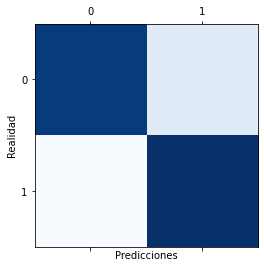

El accuracy es : 0.7352532963219987
La sensibilidad es : 0.7609618104667609
La especificidad es: 0.7104904632152589
Wall time: 1min 10s


In [52]:
%%time

predicciones = []

for i in range(49):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
    lr_model = LogisticRegression(penalty='l2', class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    lr_model = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=3)#Se entrena el modelo con datos de Train
    lr_model = lr_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = lr_model.best_estimator_
    my_lr=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)

## <center><font style="color:steelblue">10. ALGORITMO 5 - REGRESIÓN LOGÍSTICA SOLO CARACTERÍSTICAS NUMÉRICAS</font></center>

In [53]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 3)
Las dimensiones de Y son:  (5110,)


In [54]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9438, 3)
Las dimensiones de Y balanceado son:  (9438,)


In [55]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6606, 3) (6606,)
Las dimensiones del conjunto de test son:  (2832, 3) (2832,)


(2832, 49)
La matriz de confusión es:
 [[1029  407]
 [ 251 1145]]


<Figure size 432x288 with 0 Axes>

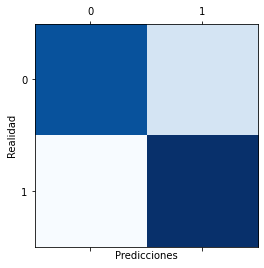

El accuracy es : 0.7676553672316384
La sensibilidad es : 0.8202005730659025
La especificidad es: 0.7165738161559888
Wall time: 30.6 s


In [56]:
%%time

predicciones = []

for i in range(49):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
    lr_model = LogisticRegression(penalty='l2', class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    lr_model = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=3)#Se entrena el modelo con datos de Train
    lr_model = lr_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = lr_model.best_estimator_
    my_lr=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)

## <center><font style="color:steelblue">11. ALGORITMO 6 - REGRESIÓN LOGÍSTICA CON TODAS LAS CARACTERÍSTICAS</font></center>

In [57]:
#X serán todas las variables menos stroke, de tal forma que luego esta sea la empleada como salida
# Obtenemos X e Y
X = data.drop(['stroke'], axis = 1)
Y = data['stroke']
print('Las dimensiones de X son: ', X.shape)
print('Las dimensiones de Y son: ', Y.shape)

Las dimensiones de X son:  (5110, 10)
Las dimensiones de Y son:  (5110,)


In [58]:
#Con el balanceo de datos aumenta el número de observaciones
np.random.seed(2)
s = SMOTETomek()
X, Y = s.fit_resample(X, Y)
print('Las dimensiones de X balanceado son: ', X.shape)
print('Las dimensiones de Y balanceado son: ', Y.shape)

Las dimensiones de X balanceado son:  (9636, 10)
Las dimensiones de Y balanceado son:  (9636,)


In [59]:
#Se separa el conjunto de datos en Train y Test
#70% de los datos pertenecerán a Train y el 30% a Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)#Comprobación de las dimensiones
print('Las dimensiones del conjunto de train son: ', X_train.shape, Y_train.shape)
print('Las dimensiones del conjunto de test son: ', X_test.shape, Y_test.shape)

Las dimensiones del conjunto de train son:  (6745, 10) (6745,)
Las dimensiones del conjunto de test son:  (2891, 10) (2891,)


C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\h

(2891, 49)
La matriz de confusión es:
 [[1053  411]
 [ 338 1089]]


<Figure size 432x288 with 0 Axes>

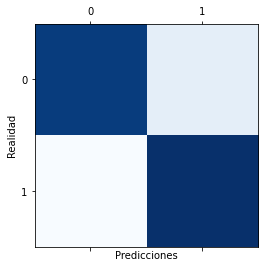

El accuracy es : 0.7409200968523002
La sensibilidad es : 0.7631394533987386
La especificidad es: 0.7192622950819673
Wall time: 1min 7s


In [60]:
%%time

predicciones = []

for i in range(49):
    X_train, Y_train = resample(X_train, Y_train, replace=True, n_samples=500, random_state=None, stratify=Y_train)

    #--------------------------VALIDACIÓN CRUZADA PARA ENCONTRAR LOS PARÁMETROS LIBRES ÓPTIMOS-------------------------
    #GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
    lr_model = LogisticRegression(penalty='l2', class_weight='balanced')#Se emplea GridSearchCV para evaluar los parámetros
    lr_model = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=3)#Se entrena el modelo con datos de Train
    lr_model = lr_model.fit(X_train, Y_train)

    #--------------------------ÁRBOL DE DECISIÓN-----------------------------------------------------------------------
    #Se entrena el modelo con esos parámetros óptimos
    my_model = lr_model.best_estimator_
    my_lr=my_model.fit(X_train, Y_train) #Se realizan las predicciones con X_test
    y_predicted = my_model.predict(X_test) #Resultados
    predicciones.append(y_predicted)
    
predicciones_matriz = np.asarray(predicciones)
predicciones_matriz = predicciones_matriz.T #En cada fila de la matriz están todas las predicciones para una muestra de test (tantas columnas como árboles creados)
print(predicciones_matriz.shape)

#---------------------------------PREDICCIONES-------------------------------------
y_predicted = []
for i in range (predicciones_matriz.shape[0]):
    elem_mas_votado = mode(predicciones_matriz[i]) #La moda es el elemento más votado de una fila
    if elem_mas_votado == 0:
        #Si en una fila hay más 0 que 1, la clase de ese paciente del conjunto de test será 0
        prediccion = 0
        y_predicted.append(prediccion)
        
    else:
        #Si en una fila hay más 1 que 0, la clase de ese paciente del conjunto de test será 1
        prediccion = 1
        y_predicted.append(prediccion)

#----------------------------MATRIZ DE CONFUSIÓN----------------------------------------
matriz = confusion_matrix(Y_test, y_predicted)
especificidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])

print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

print('El accuracy es :', accuracy_score(Y_test, y_predicted))
print('La sensibilidad es :', recall_score(Y_test, y_predicted))
print('La especificidad es:', especificidad)